# LAB-03 - Regresión Logística
## Nombre: Huarachi Clemente Ariel
## Carrera: Ing. de Sistemas
## C.U. 35-5544


# **PREPARAMOS EL DATASET**

In [135]:
# Nos conectamos a nuestro drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
# utilizando la libreria os para manejos de directorios
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd

#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # -> Necesario para graficar superficies 3D

#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [137]:
#Haciendo uso de la libreria pandas para leer el dataset.
dataset = pd.read_csv('/content/drive/MyDrive/SIS420-INTELIGENCIA ARTIFICIAL/DATASET/WA_Fn-UseC_-HR-Employee-Attrition.csv', delimiter=',')

#Imprimimos en una tabla el dataset.
dataset

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [138]:
# === INFORMACIÓN DE TIPO DE DATOS
print('INFORMACION DE TIPO DE DATOS')
data.info()

# === FALTANTES POR COLUMNA (conteo) ===
print('\nDATOS VACIOS')
print(data.isna().sum())


INFORMACION DE TIPO DE DATOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   int64 
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object


In [139]:
# Partimos de tu DataFrame actual (data)
cols_a_descartar = [c for c in ['EmployeeCount','Over18','StandardHours','EmployeeNumber'] if c in data.columns]

print("Columnas a descartar:", cols_a_descartar)
data = data.drop(columns=cols_a_descartar)

print("Shape después de descartar:", data.shape)

# Comprobación rápida del target
print("\nDistribución Attrition:")
print(data['Attrition'].value_counts())

# (Vista previa de qué queda categórico para el próximo paso)
cat_cols_restantes = data.select_dtypes(include='object').columns.tolist()
print("\nCategóricas que faltan codificar:", cat_cols_restantes)


Columnas a descartar: []
Shape después de descartar: (1470, 31)

Distribución Attrition:
Attrition
0    1233
1     237
Name: count, dtype: int64

Categóricas que faltan codificar: ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']


mostrar tabla


In [140]:
import pandas as pd

# Asegúrate de estar partiendo de la versión de 31 columnas
# (la que ya tiene Attrition 0/1 y SIN EmployeeCount/Over18/StandardHours/EmployeeNumber)
df = data.copy()

cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

# Convertir a categoría y luego a códigos enteros 0..k-1
# Guardamos los mapeos por si luego quieres usarlos en datos nuevos
ord_maps = {}
for c in cat_cols:
    df[c] = df[c].astype('category')
    ord_maps[c] = {cat: code for code, cat in enumerate(df[c].cat.categories)}
    df[c] = df[c].cat.codes.astype(int)

print("Shape final (debería seguir en 1470 x 31):", df.shape)
print("Tipos restantes:", set(map(str, df.dtypes)))
df.head(10)


Shape final (debería seguir en 1470 x 31): (1470, 31)
Tipos restantes: {'int64'}


Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   
5   32          0               1       1005           1                 2   
6   59          0               2       1324           1                 3   
7   30          0               2       1358           1                24   
8   38          0               1        216           1                23   
9   36          0               2       1299           1                27   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   
5          2               1                        4       1  ...   
6          3               3                        3       0  ...   
7          1               1                        4       1  ...   
8          3               1                        4       1  ...   
9          3               3                        3       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   
5                  3                         3                 0   
6                  4                         1                 3   
7                  4                         2                 1   
8                  4                         2                 0   
9                  3                         2                 2   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   
5                  8                      2                2               7   
6                 12                      3                2               1   
7                  1                      2                3               1   
8                 10                      2                3               9   
9                 17                      3                2               7   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  
5                   7                        3                     6  
6                   0                        0                     0  
7                   0                        0                     0  
8                   7                        1                     8  
9                   7            

In [145]:
data.shape

(1470, 31)

In [146]:


# 0) Sin NA
assert df.isna().sum().sum() == 0, "Hay NA pendientes"

# 1) Todo numérico
assert df.select_dtypes(include='object').empty, "Quedan columnas object"

# 2) Attrition bien codificado
assert set(df['Attrition'].unique()) <= {0,1}, "Attrition no está en 0/1"

# 3) Los 5 campos categóricos fueron convertidos
cat_cols = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
for c in cat_cols:
    assert c in df.columns and np.issubdtype(df[c].dtype, np.integer), f"{c} no está como entero"
print("✔️ Todo OK para seguir.")


✔️ Todo OK para seguir.


In [147]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# ✅ Usaremos df (1470 x 31) con Attrition=0/1
assert 'Attrition' in df.columns, "Falta la columna 'Attrition' en df"

# Índice de la columna objetivo (para usar iloc al estilo que te gusta)
idx_y = df.columns.get_loc('Attrition')

# Split 80/20 estratificado (mantiene la proporción de clases)
train_data, test_data = train_test_split(
    df, test_size=0.20, random_state=42, stratify=df['Attrition']
)

# ---- Estilo con ILOC (como tu ejemplo), pero robusto ----
# X = todas las columnas excepto Attrition; y = Attrition
all_idx = list(range(df.shape[1]))
x_idx = [i for i in all_idx if i != idx_y]

X_test  = test_data.iloc[:, x_idx]
y_test  = test_data.iloc[:, idx_y]

X_train = train_data.iloc[:, x_idx]
y_train = train_data.iloc[:, idx_y]

m = y_train.size

# Mostramos los datos que serán para el entrenamiento (tu mismo estilo)
print("Datos de X_train:")
print(X_train)
print('-' * 100)
print("Datos de y_train:")
print(y_train)

# Cantidades 80/20
print('-' * 80)
print("El 80% de ejemplos que serán para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 20% de ejemplos que serán para el test son: {:.0f}".format(len(test_data)))

# (Opcional) Proporción de la clase positiva para verificar el estratificado
print("\nProporción Attrition=1 -> Train: {:.3f} | Test: {:.3f}"
      .format(y_train.mean(), y_test.mean()))
print("Conteos Train -> 0:", (y_train==0).sum(), " | 1:", (y_train==1).sum())
print("Conteos Test  -> 0:", (y_test==0).sum(),  " | 1:", (y_test==1).sum())


Datos de X_train:
      Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
1194   47               2       1225           2                 2          4   
128    22               2        594           1                 2          1   
810    46               2        406           2                 3          1   
478    25               2        622           2                13          1   
491    43               1       1001           1                 9          5   
...   ...             ...        ...         ...               ...        ...   
1213   23               2        427           2                 7          3   
963    38               2       1009           2                 2          2   
734    22               2        217           1                 8          1   
1315   36               2        430           1                 2          4   
1292   39               1        766           2                20          3   

      Edu

In [148]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)


In [149]:
# Elegimos dos variables reales de tu dataset (cámbialas si quieres)
col_x = 'MonthlyIncome'
col_y = 'Age'

# Posición (índice) de esas columnas dentro de X_train
pos_x = X_train.columns.get_loc(col_x)
pos_y = X_train.columns.get_loc(col_y)

print(f"'{col_x}' está en la posición {pos_x} en X_train")
print(f"'{col_y}' está en la posición {pos_y} en X_train")


'MonthlyIncome' está en la posición 15 en X_train
'Age' está en la posición 0 en X_train


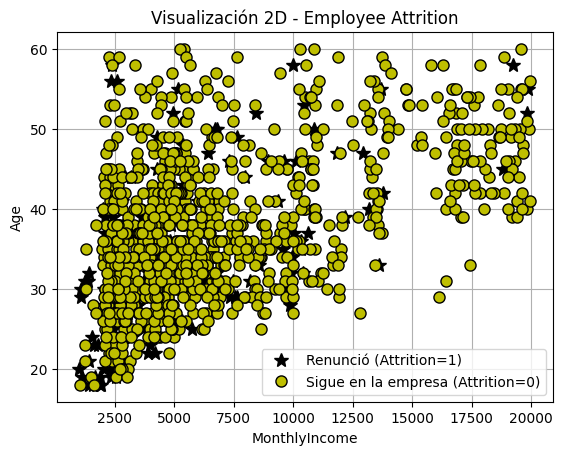

In [150]:
from matplotlib import pyplot

# Construimos la matriz que espera tu plotData (m, 2)
X_plot = X_train.iloc[:, [pos_x, pos_y]].values
y_plot = y_train.values  # 0 = sigue, 1 = renunció

# Llamamos a TU función (no la cambiamos)
plotData(X_plot, y_plot)

# Etiquetas y leyenda adaptadas a tu caso
pyplot.xlabel(col_x)
pyplot.ylabel(col_y)
pyplot.legend(['Renunció (Attrition=1)', 'Sigue en la empresa (Attrition=0)'])
pyplot.title('Visualización 2D - Employee Attrition')
pyplot.grid(True)
pyplot.show()
pass


Normalización de los datos:

In [151]:
# Defenimos la funcion de normalizacion de datos
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1  # verificar

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [152]:
# Llamamos a la funcion de normalización para normalizar los datos de X_train
X_norm, mu, sigma = featureNormalize(X_train)

In [153]:
X_norm

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
1194  1.090194        0.597520   1.049455    1.386635         -0.899915   
128  -1.634828        0.597520  -0.523449   -0.509508         -0.899915   
810   0.981193        0.597520  -0.992080    1.386635         -0.777610   
478  -1.307825        0.597520  -0.453653    1.386635          0.445433   
491   0.654191       -0.894377   0.491086   -0.509508         -0.043784   
...        ...             ...        ...         ...               ...   
1213 -1.525827        0.597520  -0.939733    1.386635         -0.288393   
963   0.109186        0.597520   0.511028    1.386635         -0.899915   
734  -1.634828        0.597520  -1.463203   -0.509508         -0.166088   
1315 -0.108815        0.597520  -0.932255   -0.509508         -0.899915   
1292  0.218187       -0.894377  -0.094702    1.386635          1.301564   

      Education  EducationField  EnvironmentSatisfaction    Gender  \
1194   1.064209       -0.938410                -0.658710 -1.221280   
128   -1.855332        2.032170                 0.260202  0.818813   
810   -1.855332       -0.195765                -1.577622  0.818813   
478   -1.855332        0.546880                -0.658710  0.818813   
491    2.037390        0.546880                 1.179114  0.818813   
...         ...             ...                      ...       ...   
1213   0.091029       -0.938410                 0.260202  0.818813   
963   -0.882152       -0.938410                -0.658710 -1.221280   
734   -1.855332       -0.938410                -0.658710  0.818813   
1315   1.064209        1.289525                 1.179114 -1.221280   
1292   0.091029       -0.938410                 0.260202  0.818813   

      HourlyRate  ...  PerformanceRating  RelationshipSatisfaction  \
1194   -0.908436  ...          -0.432065                  0.240218   
128     1.694111  ...          -0.432065                  0.240218   
810    -0.662913  ...          -0.432065                  1.160403   
478    -1.252169  ...          -0.432065                  0.240218   
491     0.319180  ...          -0.432065                 -0.679966   
...          ...  ...                ...                       ...   
1213    1.645007  ...           2.314467                 -0.679966   
963    -1.694111  ...          -0.432065                  1.160403   
734     1.399483  ...          -0.432065                 -1.600151   
1315    0.368285  ...           2.314467                  1.160403   
1292    0.859332  ...          -0.432065                  1.160403   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1194          2.613100           2.261482              -0.605389   
128           0.247430          -1.072675              -0.605389   
810           0.247430           1.492061               0.190962   
478          -0.935405          -0.559727              -1.401740   
491           0.247430          -0.175017               0.190962   
...                ...                ...                    ...   
1213          0.247430          -1.072675              -0.605389   
963           0.247430          -0.046780               0.190962   
734           0.247430          -0.944438               0.190962   
1315          0.247430           0.466167              -0.605389   
1292          0.247430          -0.559727               2.580015   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
1194         0.337621       -0.665706           -0.625365   
128          0.337621       -0.830071           -0.905635   
810          0.337621        0.813578            1.336527   
478          0.337621       -0.008246           -0.064824   
491          0.337621        0.156119            0.775986   
...               ...             ...                 ...   
1213         0.337621       -0.665706           -0.625365   
963          0.337621       -0.008246            0.775986   
734         -1.055510       -0.501341           -0.345095   
1

In [154]:
# Obtener las dimensiones del array
m, n = X_train.shape

print(f"m (número de filas): {m}")
print(f"n (número de columnas): {n}")

m (número de filas): 1176
n (número de columnas): 30


Agregamos una columna de unos

In [155]:
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [193]:
mu

Age                            36.998299
BusinessTravel                  1.599490
DailyRate                     803.991497
Department                      1.268707
DistanceFromHome                9.357993
Education                       2.906463
EducationField                  2.263605
EnvironmentSatisfaction         2.716837
Gender                          0.598639
HourlyRate                     65.500000
JobInvolvement                  2.737245
JobLevel                        2.076531
JobRole                         4.420068
JobSatisfaction                 2.719388
MaritalStatus                   1.093537
MonthlyIncome                6544.024660
MonthlyRate                 14390.239796
NumCompaniesWorked              2.693027
OverTime                        0.289116
PercentSalaryHike              15.239796
PerformanceRating               3.157313
RelationshipSatisfaction        2.738946
StockOptionLevel                0.790816
TotalWorkingYears              11.364796
TrainingTimesLastYear           2.760204
WorkLifeBalance                 2.757653
YearsAtCompany                  7.050170
YearsInCurrentRole              4.231293
YearsSinceLastPromotion         2.182823
YearsWithCurrManager            4.196429
dtype: float64

In [194]:
sigma

Age                            9.174239
BusinessTravel                 0.670288
DailyRate                    401.168749
Department                     0.527386
DistanceFromHome               8.176325
Education                      1.027559
EducationField                 1.346538
EnvironmentSatisfaction        1.088244
Gender                         0.490174
HourlyRate                    20.364660
JobInvolvement                 0.703374
JobLevel                       1.091523
JobRole                        2.473067
JobSatisfaction                1.110172
MaritalStatus                  0.729429
MonthlyIncome               4651.764902
MonthlyRate                 7189.775566
NumCompaniesWorked             2.485020
OverTime                       0.453352
PercentSalaryHike              3.677517
PerformanceRating              0.364096
RelationshipSatisfaction       1.086738
StockOptionLevel               0.845426
TotalWorkingYears              7.798074
TrainingTimesLastYear          1.255728
WorkLifeBalance                0.717807
YearsAtCompany                 6.084023
YearsInCurrentRole             3.567985
YearsSinceLastPromotion        3.213981
YearsWithCurrManager           3.563279
dtype: float64

In [156]:
X_ready

array([[ 1.        ,  1.09019402,  0.59751994, ..., -0.62536487,
        -0.36802436, -0.6164065 ],
       [ 1.        , -1.6348276 ,  0.59751994, ..., -0.9056351 ,
        -0.05688371, -0.89704685],
       [ 1.        ,  0.98119316,  0.59751994, ...,  1.33652675,
         0.5653976 ,  1.348076  ],
       ...,
       [ 1.        , -1.6348276 ,  0.59751994, ..., -0.34509464,
        -0.36802436, -0.89704685],
       [ 1.        , -0.10881549,  0.59751994, ..., -1.18590534,
        -0.67916501, -1.17768721],
       [ 1.        ,  0.21818711, -0.89437699, ..., -0.9056351 ,
        -0.05688371, -0.6164065 ]])

FUNCIÓN SIGMOIDEA

In [181]:
def calcularSigmoide(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [180]:
print(calcularSigmoide(0))

0.5


In [182]:
# Prueba la implementación de la funcion sigmoidea
z = [0, 0.5, 1]
g = calcularSigmoide(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X.

In [183]:
# después de definir calcularSigmoide(z)
def sigmoid(z):
    return calcularSigmoide(z)


In [186]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [187]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [175]:
from matplotlib import pyplot

In [185]:
# X_ready ya lo tienes como [1 | X_norm] de tamaño (m, n)
Xg = X_ready.astype(float)
yg = y_train.values.astype(float).ravel()

theta = np.zeros(Xg.shape[1], dtype=float)   # ¡no X_train.shape[1]!
alpha = 0.001
num_iters = 60000


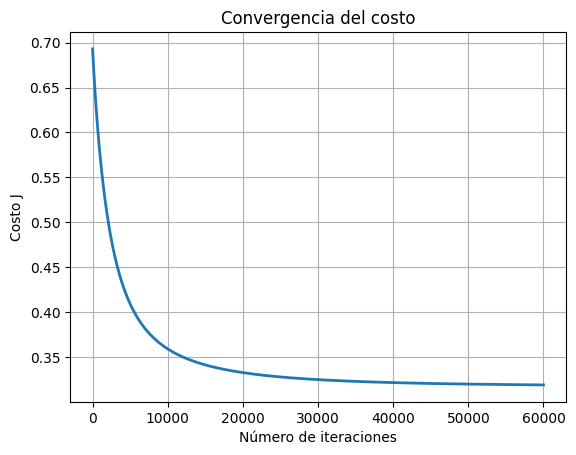

θ calculado por descenso de gradiente (dim=31):
[-2.26808051 -0.39622823 -0.02438452 -0.17703758  0.35942669  0.2906525
  0.02435057 -0.05449408 -0.40267854  0.13126262] ...


In [188]:
theta, J_history = descensoGradiente(theta, Xg, yg, alpha, num_iters)

import matplotlib.pyplot as pyplot
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')
pyplot.title('Convergencia del costo')
pyplot.grid(True)
pyplot.show()

print('θ calculado por descenso de gradiente (dim={}):'.format(theta.shape[0]))
print(theta[:10], '...')


In [189]:
print(f"Con un costo de: { J_history[-1]} ")

Con un costo de: 0.3191595524387147 


In [190]:
print("X_ready shape:", Xg.shape)  # (m, n)
print("y shape:", yg.shape)        # (m,)
print("theta shape:", theta.shape)  # (n,)


X_ready shape: (1176, 31)
y shape: (1176,)
theta shape: (31,)


# Predicción y validación del modelo


In [195]:
import numpy as np
# si X_norm es DataFrame:
print(" |mean| promedio:", np.abs(X_norm.mean()).mean())
print(" std  promedio:", X_norm.std(ddof=0).mean())


 |mean| promedio: 8.97744967304605e-17
 std  promedio: 1.0000000000000002


In [199]:
# Normalizamos el X_test
X_test_norm = (X_test - mu) / sigma
m_test = len(X_test)

X_test_norm

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
1061 -1.416826       -2.386274   0.064832    1.386635          0.445433   
891   0.763191        0.597520   0.780241   -0.509508         -0.899915   
456  -0.653820        0.597520  -0.289134    1.386635         -0.288393   
922   0.763191        0.597520   0.984644   -0.509508         -0.655306   
69   -0.108815        0.597520  -1.211439   -0.509508         -0.043784   
...        ...             ...        ...         ...               ...   
1269  0.654191        0.597520  -1.395900   -2.405651         -0.899915   
1352  0.763191        0.597520  -1.580361   -0.509508         -1.022219   
1236 -0.108815        0.597520   1.625272    1.386635          0.445433   
1023  2.071202        0.597520   1.124236   -0.509508         -1.022219   
285   0.000185        0.597520   1.415884   -0.509508         -1.022219   

      Education  EducationField  EnvironmentSatisfaction    Gender  \
1061  -0.882152       -0.938410                 1.179114 -1.221280   
891   -1.855332       -0.938410                -1.577622 -1.221280   
456    0.091029       -0.938410                 0.260202  0.818813   
922   -0.882152       -0.938410                 0.260202  0.818813   
69     0.091029        0.546880                 1.179114  0.818813   
...         ...             ...                      ...       ...   
1269   0.091029       -0.938410                -0.658710  0.818813   
1352   1.064209       -0.938410                -0.658710  0.818813   
1236   2.037390       -0.195765                -0.658710  0.818813   
1023  -0.882152       -0.938410                -1.577622 -1.221280   
285    0.091029       -0.938410                 1.179114 -1.221280   

      HourlyRate  ...  PerformanceRating  RelationshipSatisfaction  \
1061    0.613808  ...          -0.432065                  0.240218   
891     0.319180  ...          -0.432065                  1.160403   
456    -1.055750  ...           2.314467                  0.240218   
922     1.301274  ...          -0.432065                  1.160403   
69      0.662913  ...          -0.432065                 -1.600151   
...          ...  ...                ...                       ...   
1269    1.546797  ...          -0.432065                 -0.679966   
1352    0.613808  ...          -0.432065                  1.160403   
1236    1.497693  ...          -0.432065                 -0.679966   
1023    1.203065  ...           2.314467                  1.160403   
285    -1.153960  ...          -0.432065                 -0.679966   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1061          0.247430          -1.329148              -0.605389   
891           0.247430          -0.175017               1.783664   
456           0.247430          -0.175017               0.190962   
922           1.430265           1.876772               0.987313   
69            0.247430          -1.200911              -2.198092   
...                ...                ...                    ...   
1269         -0.935405          -0.175017               1.783664   
1352          0.247430          -0.175017               1.783664   
1236          2.613100           0.594404               0.190962   
1023          0.247430          -0.816201               0.190962   
285          -0.935405           0.722641               0.190962   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
1061         0.337621       -0.994436           -1.185905   
891          0.337621        0.484849            0.215446   
456         -1.055510       -0.336976           -0.064824   
922         -1.055510        2.950322            1.336527   
69          -1.055510       -0.994436           -1.185905   
...               ...             ...                 ...   
1269         0.337621        0.320484            0.775986   
1352         0.337621       -0.830071           -1.185905   
1236         0.337621       -0.830071           -0.625365   
1

In [200]:
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)
print(X_test_ready)

[[ 1.00000000e+00 -1.41682587e+00 -2.38627392e+00 ... -1.18590534e+00
  -6.79165010e-01 -1.17768721e+00]
 [ 1.00000000e+00  7.63191429e-01  5.97519945e-01 ...  2.15445825e-01
   1.49881955e+00  7.86795286e-01]
 [ 1.00000000e+00 -6.53819813e-01  5.97519945e-01 ... -6.48244074e-02
  -6.79165010e-01 -8.97046855e-01]
 ...
 [ 1.00000000e+00 -1.08815489e-01  5.97519945e-01 ... -6.25364871e-01
  -5.68837075e-02 -6.16406498e-01]
 [ 1.00000000e+00  2.07120181e+00  5.97519945e-01 ... -6.25364871e-01
  -3.68024359e-01 -1.17768721e+00]
 [ 1.00000000e+00  1.85375620e-04  5.97519945e-01 ...  2.17733745e+00
   8.76538246e-01  7.86795286e-01]]


In [202]:
# Probabilidades de attrition (renuncia) en TEST — vectorizado
y_proba = calcularSigmoide(X_test_ready @ theta)      # shape (m_test,)

# (si quieres conservar el nombre que usabas)
y_predicha = y_proba

# Umbral (puedes moverlo si quieres)
umbral = 0.5
y_pred = (y_proba >= umbral).astype(int)              # 1=Renuncia, 0=Sigue

# DataFrame prolijo con % y etiquetas
df_pred = pd.DataFrame({
    "Prob_Attrition": y_proba,
    "Prob_Attrition_%": (y_proba * 100).round(2),
    "Pred_Attrition": y_pred,
    "Attrition_real": y_test.values
}, index=y_test.index)

df_pred["Pred_label"] = df_pred["Pred_Attrition"].map({1:"Renuncia", 0:"Sigue"})
df_pred["Real_label"] = df_pred["Attrition_real"].map({1:"Renuncia", 0:"Sigue"})

# Muestra rápida
df_pred.head(15)


Prob_Attrition  Prob_Attrition_%  Pred_Attrition  Attrition_real  \
1061        0.170603             17.06               0               0   
891         0.011147              1.11               0               0   
456         0.193975             19.40               0               0   
922         0.003111              0.31               0               0   
69          0.492861             49.29               0               1   
1164        0.318995             31.90               0               0   
406         0.037448              3.74               0               0   
1330        0.016862              1.69               0               0   
1232        0.016314              1.63               0               0   
1311        0.368675             36.87               0               0   
1212        0.151985             15.20               0               0   
771         0.095033              9.50               0               0   
196         0.177597             17.76               0               0   
1274        0.219020             21.90               0               0   
930         0.143461             14.35               0               0   

     Pred_label Real_label  
1061      Sigue      Sigue  
891       Sigue      Sigue  
456       Sigue      Sigue  
922       Sigue      Sigue  
69        Sigue   Renuncia  
1164      Sigue      Sigue  
406       Sigue      Sigue  
1330      Sigue      Sigue  
1232      Sigue      Sigue  
1311      Sigue      Sigue  
1212      Sigue      Sigue  
771       Sigue      Sigue  
196       Sigue      Sigue  
1274      Sigue      Sigue  
930       Sigue      Sigue

In [204]:
df_pred = pd.DataFrame((y_proba * 100).round(2), columns=["Probabilidad de renuncia %"])


In [206]:
# 1) (por si acaso) calcula las probabilidades primero
y_proba = calcularSigmoide(X_test_ready @ theta)   # vector de tamaño m_test

# 2) crea el DataFrame en %
df_pred = pd.DataFrame(
    {"Probabilidad de renuncia %": (y_proba * 100).round(2)},
    index=y_test.index
)

# 3) muéstralo
from IPython.display import display
display(df_pred.head(20))   # o simplemente: df_pred


Probabilidad de renuncia %
1061                       17.06
891                         1.11
456                        19.40
922                         0.31
69                         49.29
1164                       31.90
406                         3.74
1330                        1.69
1232                        1.63
1311                       36.87
1212                       15.20
771                         9.50
196                        17.76
1274                       21.90
930                        14.35
318                        52.70
403                         2.13
261                         4.30
602                        46.50
1458                        5.28

In [207]:
y_umbral = (y_predicha >= 0.5).astype(int)

In [208]:

# Mostramos la precisión de entrenamiento
print("Precisión de entrenamiento: {:.2f} % ".format(np.mean(y_umbral == y_test.values.ravel()) * 100))

Precisión de entrenamiento: 88.10 % 


In [209]:
# Mostramos la precisión de entrenamiento
proba_train   = calcularSigmoide(X_ready @ theta)          # probs en train
y_pred_train  = (proba_train >= 0.5).astype(int)           # 0/1 con umbral 0.5
acc_train     = (y_pred_train == y_train.values).mean()    # exactitud

print(f"Precisión de entrenamiento: {acc_train*100:.2f}%")


Precisión de entrenamiento: 87.41%
